In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import train_test_split

In [2]:
FILE_TRAIN = 'data/pp-training.csv'
FILE_TEST = 'data/pp-testing.csv'

In [3]:
df = pd.read_csv(FILE_TRAIN, low_memory=False)

In [15]:
allcols = df.columns
alldata = df
X_train, X_test, y_train, y_test = train_test_split(alldata.drop(['price'], axis=1),alldata.price, test_size=0.4, train_size=0.1, random_state=0)

In [5]:
# probando los valores por default
bag = BaggingRegressor(random_state=0)
bag.fit(X_train,y_train)
bag.score(X_test,y_test)

0.69584579453749307

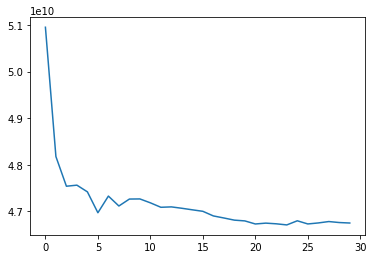

In [16]:
#vemos si aumentando la cantidad de estimadores mejora el score
scores = []
n=10
for i in range(30):
    bag.set_params(n_estimators=n, n_jobs=-1)
    bag.fit(X_train,y_train)
    scores.append(mean_squared_error(bag.predict(X_test), y_test))
    n+=10
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(scores)

In [7]:
bag.set_params(n_estimators=70)
bag.fit(X_train,y_train)
bag.score(X_test,y_test)

0.57739344696023265

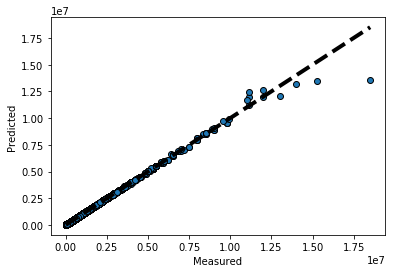

In [8]:
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt


# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
predicted = cross_val_predict(bag, df, df.price, cv=10)

fig, ax = plt.subplots()
ax.scatter(df.price, predicted, edgecolors=(0, 0, 0))
ax.plot([df.price.min(), df.price.max()], [df.price.min(), df.price.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [6]:
from sklearn.metrics import mean_squared_error
allcols = df.columns
alldata = df
X_train, X_test, y_train, y_test = train_test_split(alldata.drop(['price'], axis=1),alldata.price, test_size=0.1, train_size=0.9, random_state=0)
bag.set_params(n_estimators=70)
bag.fit(X_train,y_train)
mean_squared_error(bag.predict(X_test), y_test)

31479275288.116489

In [14]:
bag = BaggingRegressor(random_state=0, n_jobs=-1)
bag.set_params(n_estimators=70, bootstrap_features=True)
bag.fit(X_train,y_train)
mean_squared_error(bag.predict(X_test), y_test)

29438261874.174408

In [17]:
bag = BaggingRegressor(random_state=0, n_jobs=-1)
bag.set_params(n_estimators=70, bootstrap_features=True, max_samples=0.9, max_features=0.9)
bag.fit(X_train,y_train)
mean_squared_error(bag.predict(X_test), y_test)

30654883625.348637

In [18]:
bag = BaggingRegressor(random_state=0, n_jobs=-1)
bag.set_params(n_estimators=70, bootstrap_features=True, max_samples=1, max_features=0.9)
bag.fit(X_train,y_train)
mean_squared_error(bag.predict(X_test), y_test)

117183292660.61284

In [21]:
#Mejor
bag = BaggingRegressor(random_state=0, n_jobs=-1)
bag.set_params(n_estimators=80, bootstrap_features=True)
bag.fit(X_train,y_train)
mean_squared_error(bag.predict(X_test), y_test)

29264059984.790657

In [23]:
bag = BaggingRegressor(random_state=0, n_jobs=-1)
bag.set_params(n_estimators=100, bootstrap_features=True)
bag.fit(X_train,y_train)
mean_squared_error(bag.predict(X_test), y_test)

29273723575.155815

In [26]:
bag = BaggingRegressor(random_state=0, n_jobs=-1)
bag.set_params(n_estimators=80, bootstrap_features=True)

BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=True,
         max_features=1.0, max_samples=1.0, n_estimators=80, n_jobs=-1,
         oob_score=False, random_state=0, verbose=0, warm_start=False)

In [27]:
bag.fit(alldata.drop(['price'], axis=1),alldata.price)

BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=True,
         max_features=1.0, max_samples=1.0, n_estimators=80, n_jobs=-1,
         oob_score=False, random_state=0, verbose=0, warm_start=False)

In [30]:
df = pd.read_csv(FILE_TEST, low_memory=False)
predicted = bag.predict(df)
df = df[list(alldata.drop(['price'], axis=1))]
predicted_2 = bag.predict(df)

In [38]:
ids = pd.read_csv('data/properati_dataset_testing_noprice.csv')
ids = ids[['id']]
df2 = pd.DataFrame(predicted)
df3 = ids.join(df2)
df3.columns = ['id','price_usd']
df3.to_csv('data/prediccion-kaggle-bagg-1.csv', index=False)
df3 = df3.set_index('id')

In [43]:
# Menos columnas
df = pd.read_csv(FILE_TRAIN, low_memory=False)

In [52]:
cols = ['surface_covered_in_m2','lat','lon','property_type','pileta','cochera','tipos de ambientes']
X_train, X_test, y_train, y_test = train_test_split(alldata[cols],alldata.price, test_size=0.1, train_size=0.9, random_state=0)

In [53]:
bag = BaggingRegressor(random_state=0, n_jobs=-1)
bag.set_params(n_estimators=80, bootstrap_features=True)
bag.fit(X_train,y_train)
mean_squared_error(bag.predict(X_test), y_test)

35640913305.461769

In [14]:
100 -((28953724645.0 * 100)/29264059984.790657)

1.0604657725276212

In [9]:
bag = BaggingRegressor(random_state=0, n_jobs=-1)
bag.set_params(n_estimators=200, bootstrap_features=True)
bag.fit(X_train,y_train)
print(mean_squared_error(bag.predict(X_test), y_test))
print(bag.score(X_test,y_test))

28953724645.0
0.74818381328


In [17]:
X_train, X_test, y_train, y_test = train_test_split(alldata.drop(['price'],axis=1),alldata.price, test_size=0.01, train_size=0.99, random_state=0)

In [11]:
bag = BaggingRegressor(random_state=0, n_jobs=-1)
bag.set_params(n_estimators=250, bootstrap_features=True)
bag.fit(X_train,y_train)
print(mean_squared_error(bag.predict(X_test), y_test))
print(bag.score(X_test,y_test))

28953724645.0
0.74818381328
